In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_parquet('../Dataset/channels_4146.parquet')

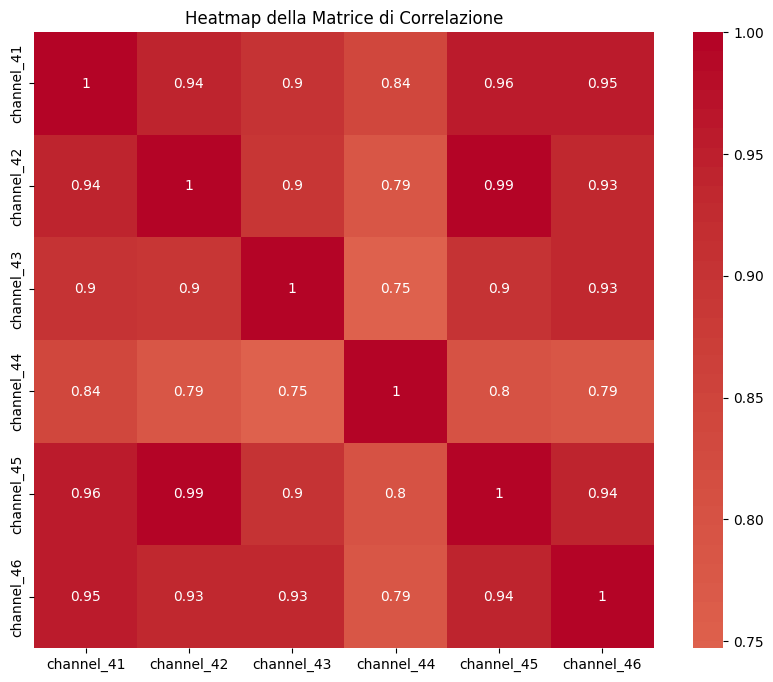

In [5]:
correlation_matrix = df.drop('is_anomaly', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap della Matrice di Correlazione')
plt.show()

(14728321, 8)
is_anomaly
0    773
1    227
Name: count, dtype: int64


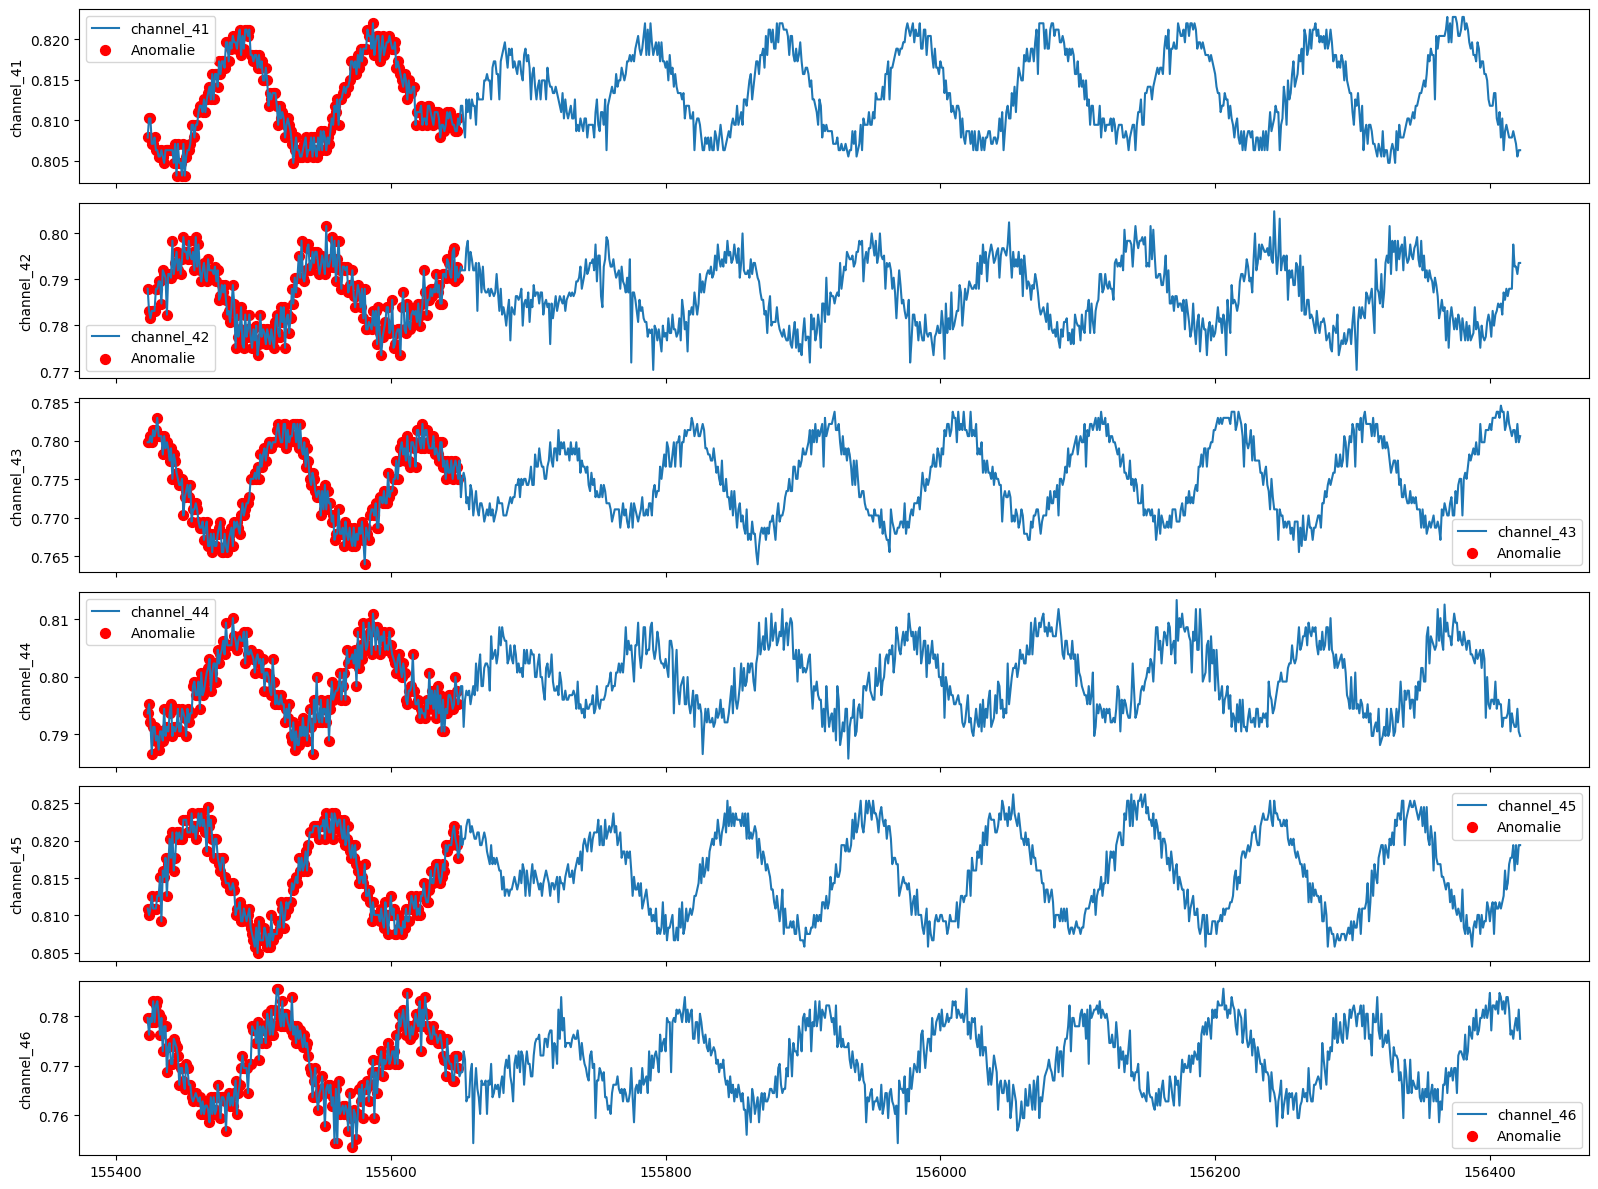

In [26]:
print(df.shape)

# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'
start = df[col_anomaly].idxmax() + 40040
n = 1000
small = df[start:start+n]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

(14728321, 8)
Anomaly
0    719
1    281
Name: count, dtype: int64


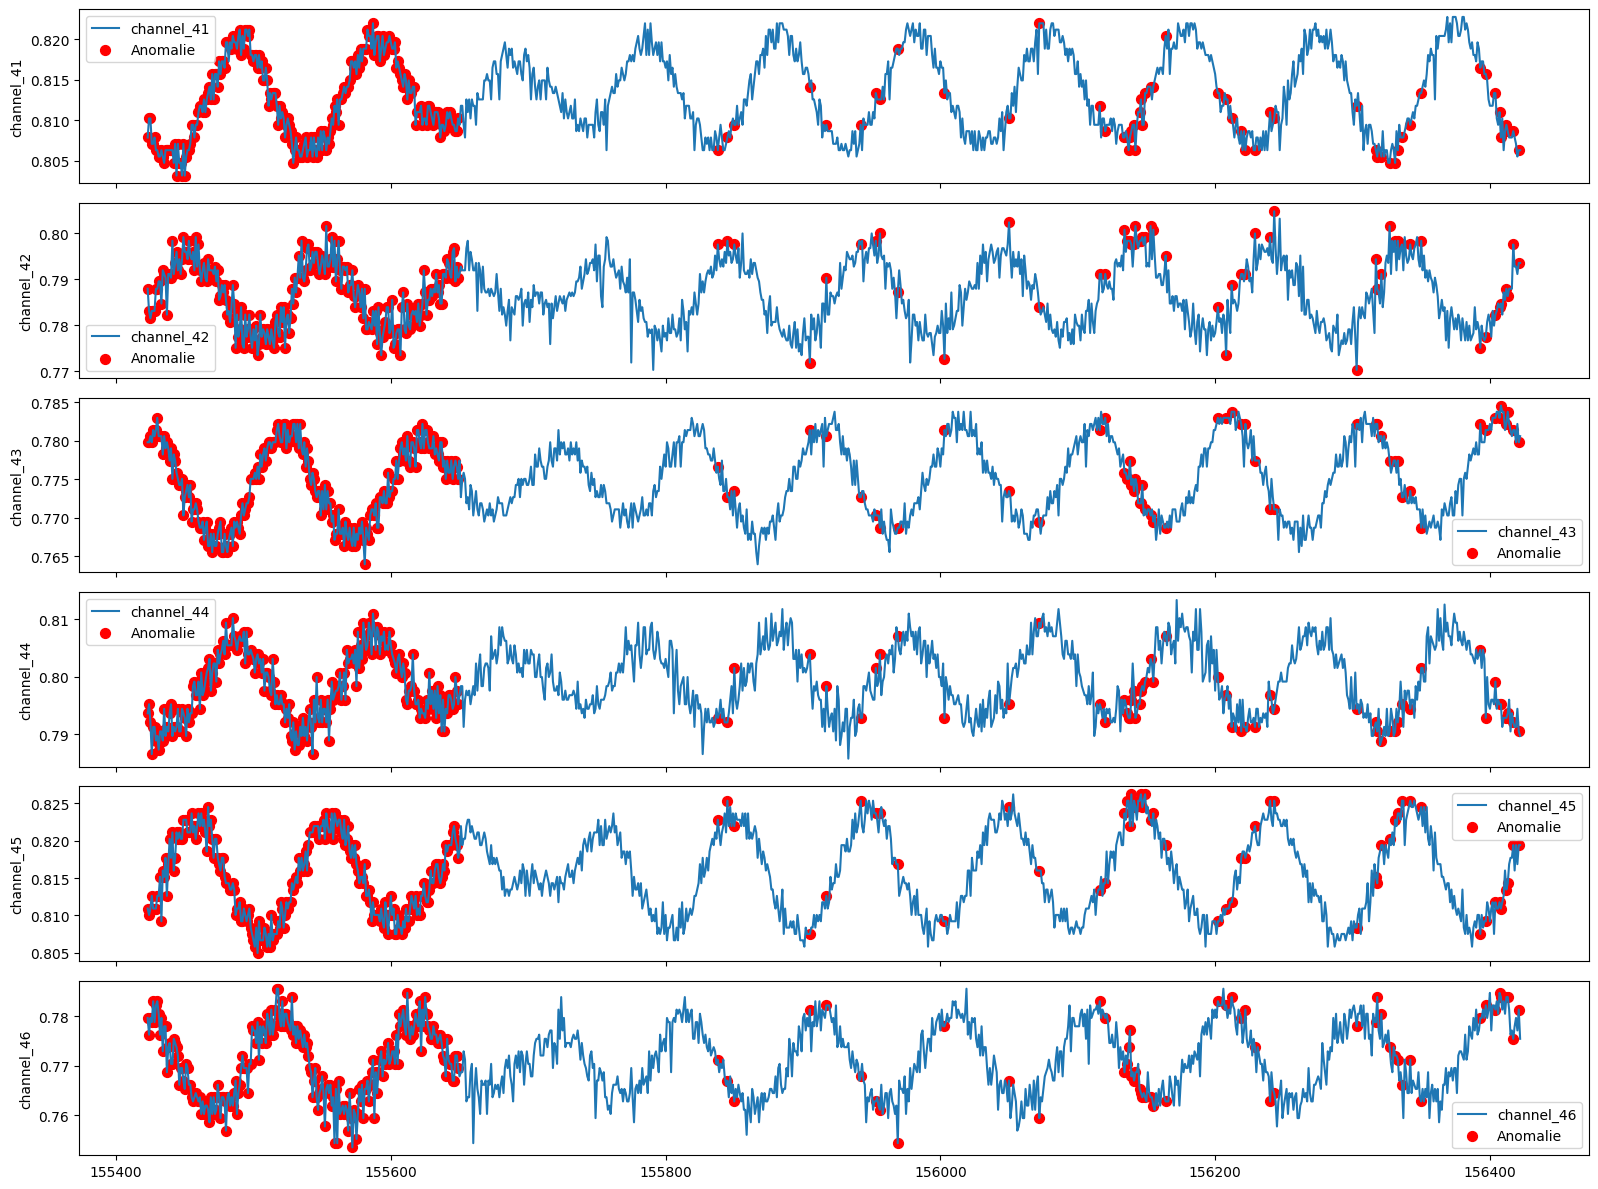

In [27]:
print(df.shape)

# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly'
#start = df[col_anomaly].idxmax() + 40040
n = 1000
small = df[start:start+n]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from pyod.models.dif import DIF


model = IForest(contamination=0.11)  # Assume che il 5% dei dati siano anomalie

# Adattiamo il modello ai dati
model.fit(df)

# Otteniamo le etichette (-1 = anomalia, 1 = normale)
df["Anomaly"] = model.labels_


In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df['is_anomaly'], model.labels_))

0.9745813524841019


In [17]:
print(df['Anomaly'].value_counts())

Anomaly
0    13108205
1     1620116
Name: count, dtype: int64


In [13]:
df['is_anomaly'].value_counts()

is_anomaly
0    13184217
1     1544104
Name: count, dtype: int64

In [14]:
1544104 / 13184217

0.11711761115582367